In [1]:
# Install the Kaggle API
!pip install kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()  # choose kaggle.json from your Downloads folder

# Make a hidden .kaggle directory and move the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.30GB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Check shape and first few rows
print("Shape:", df.shape)
df.head()


Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
print("\nFraud vs Normal counts:\n", df['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time']   = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original columns
df = df.drop(['Time', 'Amount'], axis=1)

# Reorder columns for convenience
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)
print("Fraud ratio in training:", y_train.mean())
print("Fraud ratio in test:", y_test.mean())


Training set: (227845, 30)
Test set: (56962, 30)
Fraud ratio in training: 0.001729245759178389
Fraud ratio in test: 0.0017204452090867595


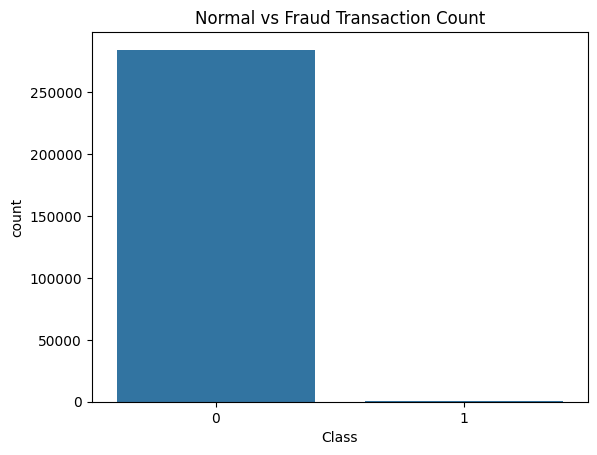

In [8]:
sns.countplot(x=y)
plt.title("Normal vs Fraud Transaction Count")
plt.show()


In [9]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [10]:
print("✅ Dataset successfully loaded and preprocessed!")
print("Training set:", X_train.shape, " | Test set:", X_test.shape)


✅ Dataset successfully loaded and preprocessed!
Training set: (227845, 30)  | Test set: (56962, 30)


In [11]:
# Install if missing
!pip install -q xgboost tensorflow

# --- Imports ---
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, average_precision_score,
                             precision_recall_curve, roc_curve, auc)

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

print("Libraries loaded. numpy:", np.__version__, "pandas:", pd.__version__)


Libraries loaded. numpy: 2.0.2 pandas: 2.2.2


In [12]:
try:
    X_train, X_test, y_train, y_test
    print("Using in-memory X_train/X_test/y_train/y_test")
except NameError:
    print("Reading saved CSVs...")
    X_train = pd.read_csv('X_train.csv')
    X_test  = pd.read_csv('X_test.csv')
    y_train = pd.read_csv('y_train.csv', header=None, squeeze=True)
    y_test  = pd.read_csv('y_test.csv', header=None, squeeze=True)

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Using in-memory X_train/X_test/y_train/y_test
Shapes: (227845, 30) (56962, 30) (227845,) (56962,)


In [13]:
scaler_all = StandardScaler()
scaler_all.fit(X_train)

X_train_scaled = scaler_all.transform(X_train)
X_test_scaled  = scaler_all.transform(X_test)

joblib.dump(scaler_all, 'scaler_all.joblib')
print("Scaler saved as scaler_all.joblib")


Scaler saved as scaler_all.joblib


In [14]:
rf = RandomForestClassifier(
    n_estimators=200,       # reduce if slow
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

print("Training RandomForest...")
rf.fit(X_train_scaled, y_train)

joblib.dump(rf, 'rf_baseline.joblib')
print("RandomForest saved as rf_baseline.joblib")


Training RandomForest...
RandomForest saved as rf_baseline.joblib


In [17]:
import xgboost as xgb

# --- Validation split (from train) ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.10, stratify=y_train, random_state=42
)

# --- Compute scale_pos_weight for imbalanced classes ---
pos = np.sum(y_tr == 1)
neg = np.sum(y_tr == 0)
scale_pos_weight = neg / pos if pos != 0 else 1.0
print("scale_pos_weight for XGBoost:", scale_pos_weight)

# --- Convert to DMatrix (required for xgb.train) ---
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval   = xgb.DMatrix(X_val, label=y_val)

# --- Parameters ---
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_pos_weight,
    'max_depth': 6,
    'eta': 0.1,
    'seed': 42
}

evallist = [(dval, 'eval'), (dtrain, 'train')]

# --- Train with early stopping ---
print("Training XGBoost with early stopping (3.x API)...")
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,          # max rounds
    evals=evallist,
    early_stopping_rounds=20,
    verbose_eval=20
)

# --- Save model ---
bst.save_model('xgb_baseline.json')
print("XGBoost saved as xgb_baseline.json")

# --- Predict example ---
y_val_pred_prob = bst.predict(dval)
y_val_pred = (y_val_pred_prob >= 0.5).astype(int)



scale_pos_weight for XGBoost: 576.6338028169014
Training XGBoost with early stopping (3.x API)...
[0]	eval-auc:0.87821	train-auc:0.99486
[20]	eval-auc:0.90114	train-auc:0.99985
[40]	eval-auc:0.92360	train-auc:0.99992
[60]	eval-auc:0.93560	train-auc:0.99998
[80]	eval-auc:0.93229	train-auc:0.99999
[100]	eval-auc:0.94312	train-auc:1.00000
[120]	eval-auc:0.94380	train-auc:1.00000
[140]	eval-auc:0.94786	train-auc:1.00000
[145]	eval-auc:0.94840	train-auc:1.00000
XGBoost saved as xgb_baseline.json


In [18]:
# Convert test features to DMatrix (required for XGBoost 3.x Booster)
dtest = xgb.DMatrix(X_test_scaled)

# Predict probabilities
y_test_pred_prob = bst.predict(dtest)

# Convert probabilities to class labels (0/1) using threshold 0.5
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Optional: check first 10 predictions
print("First 10 predicted probabilities:", y_test_pred_prob[:10])
print("First 10 predicted classes:", y_test_pred[:10])


First 10 predicted probabilities: [9.8424762e-06 1.6616157e-05 1.4409475e-04 6.9045323e-06 4.5012310e-04
 1.1723194e-05 6.5301165e-06 7.2014509e-06 1.7355826e-05 7.8257708e-06]
First 10 predicted classes: [0 0 0 0 0 0 0 0 0 0]


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

def evaluate_model(model, X_test_arr, y_test_arr, name="model", is_booster=False):
    if is_booster:
        dtest = xgb.DMatrix(X_test_arr)
        y_scores = model.predict(dtest)
    else:
        y_scores = model.predict_proba(X_test_arr)[:,1]

    y_pred = (y_scores >= 0.5).astype(int)

    print(f"\n--- Evaluation: {name} ---")
    print(classification_report(y_test_arr, y_pred, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_test_arr, y_pred))
    print("ROC AUC:", roc_auc_score(y_test_arr, y_scores))
    print("PR AUC (average precision):", average_precision_score(y_test_arr, y_scores))
    return y_scores, y_pred

# RF evaluation
rf_scores, rf_pred = evaluate_model(rf, X_test_scaled, y_test, name="RandomForest")

# XGBoost evaluation (3.x Booster)
xgb_scores, xgb_pred = evaluate_model(bst, X_test_scaled, y_test, name="XGBoost", is_booster=True)



--- Evaluation: RandomForest ---
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion matrix:
 [[56861     3]
 [   24    74]]
ROC AUC: 0.9621719168111814
PR AUC (average precision): 0.8581803803131642

--- Evaluation: XGBoost ---
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8737    0.8469    0.8601        98

    accuracy                         0.9995     56962
   macro avg     0.9367    0.9234    0.9299     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion matrix:
 [[56852    12]
 [   15    83]]
ROC AUC: 0.9736847960906365
PR AUC (average precision): 0.8810259368332071


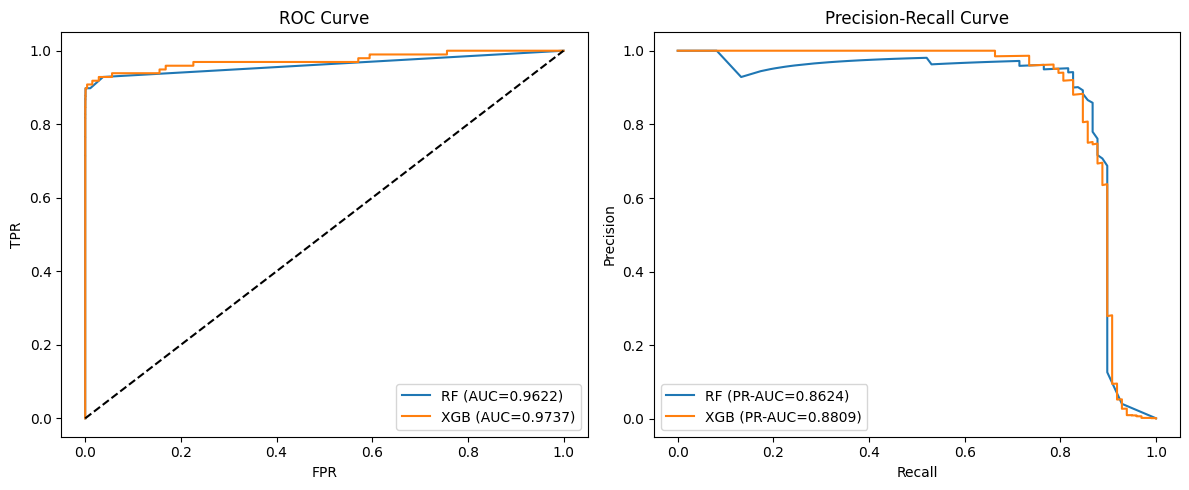

In [20]:
plt.figure(figsize=(12,5))

# ROC
plt.subplot(1,2,1)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_scores)
roc_auc_rf = auc(fpr_rf, tpr_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_scores)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC={roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC={roc_auc_xgb:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend()

# PR
plt.subplot(1,2,2)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf_scores)
pr_auc_rf = auc(rec_rf, prec_rf)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, xgb_scores)
pr_auc_xgb = auc(rec_xgb, prec_xgb)
plt.plot(rec_rf, prec_rf, label=f'RF (PR-AUC={pr_auc_rf:.4f})')
plt.plot(rec_xgb, prec_xgb, label=f'XGB (PR-AUC={pr_auc_xgb:.4f})')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve'); plt.legend()

plt.tight_layout()
plt.show()


In [21]:
# Convert to numpy arrays
X_train_arr = X_train_scaled
X_test_arr  = X_test_scaled
y_train_arr = y_train.values if hasattr(y_train, 'values') else np.array(y_train)
y_test_arr  = y_test.values if hasattr(y_test, 'values') else np.array(y_test)

# Train autoencoder on normal transactions only (y==0)
mask_normal = (y_train_arr == 0)
X_train_normal = X_train_arr[mask_normal]

input_dim = X_train_arr.shape[1]
encoding_dim = 32  # bottleneck size; adjust if needed

inp = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(encoding_dim, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
out = Dense(input_dim, activation='linear')(x)

autoencoder = Model(inputs=inp, outputs=out)
autoencoder.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("Training autoencoder on normal transactions only...")
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=20,       # increase if needed
    batch_size=256,
    validation_split=0.1,
    callbacks=[es],
    verbose=2
)

autoencoder.save('autoencoder_model.h5')
print("Autoencoder saved as autoencoder_model.h5")


Training autoencoder on normal transactions only...
Epoch 1/20
800/800 - 6s - 8ms/step - loss: 0.1720 - val_loss: 0.0306
Epoch 2/20
800/800 - 5s - 6ms/step - loss: 0.0303 - val_loss: 0.0176
Epoch 3/20
800/800 - 4s - 4ms/step - loss: 0.0190 - val_loss: 0.0110
Epoch 4/20
800/800 - 3s - 4ms/step - loss: 0.0123 - val_loss: 0.0082
Epoch 5/20
800/800 - 4s - 5ms/step - loss: 0.0098 - val_loss: 0.0073
Epoch 6/20
800/800 - 4s - 5ms/step - loss: 0.0079 - val_loss: 0.0054
Epoch 7/20
800/800 - 3s - 4ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 8/20
800/800 - 3s - 4ms/step - loss: 0.0048 - val_loss: 0.0032
Epoch 9/20
800/800 - 5s - 6ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 10/20
800/800 - 3s - 4ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 11/20
800/800 - 3s - 4ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 12/20
800/800 - 5s - 6ms/step - loss: 0.0025 - val_loss: 0.0018


Autoencoder saved as autoencoder_model.h5


In [22]:
autoencoder.save('autoencoder_model.keras')


In [23]:
# --- Step 1: Compute reconstruction error (MSE per sample) ---
# Use the trained autoencoder to reconstruct inputs
recon_train = np.mean(np.square(X_train_arr - autoencoder.predict(X_train_arr)), axis=1)
recon_test  = np.mean(np.square(X_test_arr - autoencoder.predict(X_test_arr)), axis=1)

# --- Step 2: Convert numpy arrays to DataFrames ---
X_train_df = pd.DataFrame(X_train_arr, columns=X_train.columns)
X_test_df  = pd.DataFrame(X_test_arr, columns=X_test.columns)

# --- Step 3: Add reconstruction error as a new column ---
X_train_df['recon_error'] = recon_train
X_test_df['recon_error']  = recon_test

# --- Step 4: Verify shapes ---
print("Augmented features with recon_error. Shapes:")
print("X_train_df:", X_train_df.shape)
print("X_test_df :", X_test_df.shape)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Augmented features with recon_error. Shapes:
X_train_df: (227845, 31)
X_test_df : (56962, 31)


In [27]:
# --- Step 1: Convert to DMatrix ---
dtrain = xgb.DMatrix(X_tr_a, label=y_tr_a)
dval   = xgb.DMatrix(X_val_a, label=y_val_a)

# --- Step 2: Set parameters ---
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': np.sum(y_tr_a==0) / max(1, np.sum(y_tr_a==1)),
    'max_depth': 6,
    'eta': 0.1,
    'seed': 42,
    'nthread': -1
}

# --- Step 3: Train with early stopping ---
evals = [(dtrain, 'train'), (dval, 'validation')]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=300,         # equivalent to n_estimators
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=20
)

# --- Step 4: Save the trained model ---
bst.save_model('xgb_augmented_dmatrix.model')
print("XGBoost trained using DMatrix and saved successfully.")


[0]	train-auc:0.99492	validation-auc:0.87823
[20]	train-auc:0.99985	validation-auc:0.93336
[40]	train-auc:0.99993	validation-auc:0.94046
[46]	train-auc:0.99994	validation-auc:0.93785
XGBoost trained using DMatrix and saved successfully.


/tmp/ipython-input-2194536122.py:29: UserWarning: [10:56:17] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  bst.save_model('xgb_augmented_dmatrix.model')


In [28]:
dtest = xgb.DMatrix(X_test_aug)
y_test_pred_prob = bst.predict(dtest)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

print("First 10 predicted probabilities:", y_test_pred_prob[:10])
print("First 10 predicted classes:", y_test_pred[:10])


First 10 predicted probabilities: [0.00385207 0.00390329 0.04519225 0.00718905 0.04651259 0.00385922
 0.0039106  0.0039157  0.00495013 0.0039106 ]
First 10 predicted classes: [0 0 0 0 0 0 0 0 0 0]


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, auc

# --- RandomForest (augmented) predictions ---
rf_aug_scores = rf_aug.predict_proba(X_test_aug)[:,1]
rf_aug_pred   = (rf_aug_scores >= 0.5).astype(int)

print("\n--- Evaluation: RandomForest (augmented) ---")
print(classification_report(y_test, rf_aug_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, rf_aug_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_aug_scores))
print("PR AUC (average precision):", average_precision_score(y_test, rf_aug_scores))

# --- XGBoost (augmented, DMatrix) predictions ---
dtest = xgb.DMatrix(X_test_aug)
xgb_aug_scores = bst.predict(dtest)
xgb_aug_pred   = (xgb_aug_scores >= 0.5).astype(int)

print("\n--- Evaluation: XGBoost (augmented) ---")
print(classification_report(y_test, xgb_aug_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, xgb_aug_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_aug_scores))
print("PR AUC (average precision):", average_precision_score(y_test, xgb_aug_scores))

# --- Compare XGBoost baseline vs augmented ---
# (Use xgb_scores from Cell 6 baseline)
print("\n--- XGBoost comparison ---")
print("Baseline ROC-AUC: {:.4f}, PR-AUC: {:.6f}".format(
    roc_auc_score(y_test, xgb_scores),
    average_precision_score(y_test, xgb_scores)
))
print("Augmented ROC-AUC: {:.4f}, PR-AUC: {:.6f}".format(
    roc_auc_score(y_test, xgb_aug_scores),
    average_precision_score(y_test, xgb_aug_scores)
))



--- Evaluation: RandomForest (augmented) ---
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9500    0.7755    0.8539        98

    accuracy                         0.9995     56962
   macro avg     0.9748    0.8877    0.9269     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion matrix:
 [[56860     4]
 [   22    76]]
ROC AUC: 0.962316640921985
PR AUC (average precision): 0.8685161298528349

--- Evaluation: XGBoost (augmented) ---
              precision    recall  f1-score   support

           0     0.9998    0.9979    0.9988     56864
           1     0.4135    0.8776    0.5621        98

    accuracy                         0.9976     56962
   macro avg     0.7066    0.9377    0.7805     56962
weighted avg     0.9988    0.9976    0.9981     56962

Confusion matrix:
 [[56742   122]
 [   12    86]]
ROC AUC: 0.9708249471707648
PR AUC (average precision): 0.8123939777623137

--- XGBoo

In [30]:
# --- Step 1: Compute reconstruction error (MSE per sample) ---
recon_train = np.mean(np.square(X_train_arr - autoencoder.predict(X_train_arr)), axis=1)
recon_test  = np.mean(np.square(X_test_arr - autoencoder.predict(X_test_arr)), axis=1)

# --- Step 2: Convert to DataFrame ---
X_train_df = pd.DataFrame(X_train_arr, columns=X_train.columns)
X_test_df  = pd.DataFrame(X_test_arr,  columns=X_test.columns)

# --- Step 3: Add reconstruction error ---
X_train_df['recon_error'] = recon_train
X_test_df['recon_error']  = recon_test

# --- Step 4: Scale recon_error to avoid extreme values ---
from sklearn.preprocessing import StandardScaler

scaler_recon = StandardScaler()
X_train_df['recon_error'] = scaler_recon.fit_transform(X_train_df[['recon_error']])
X_test_df['recon_error']  = scaler_recon.transform(X_test_df[['recon_error']])

# --- Step 5: Convert back to arrays for training ---
X_train_aug = X_train_df.values
X_test_aug  = X_test_df.values

print("Augmented features ready. Shapes:", X_train_aug.shape, X_test_aug.shape)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Augmented features ready. Shapes: (227845, 31) (56962, 31)


In [31]:
# --- RandomForest ---
from sklearn.ensemble import RandomForestClassifier
import joblib

rf_aug = RandomForestClassifier(
    n_estimators=200,  # reduce if slow
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
print("Training RandomForest on augmented features...")
rf_aug.fit(X_train_aug, y_train)

# --- XGBoost using DMatrix + early stopping ---
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create validation split
X_tr_a, X_val_a, y_tr_a, y_val_a = train_test_split(
    X_train_aug, y_train, test_size=0.10, stratify=y_train, random_state=42
)

# Compute scale_pos_weight
pos = np.sum(y_tr_a == 1)
neg = np.sum(y_tr_a == 0)
scale_pos_weight = neg / pos if pos != 0 else 1.0

dtrain = xgb.DMatrix(X_tr_a, label=y_tr_a)
dval   = xgb.DMatrix(X_val_a, label=y_val_a)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 6,
    'eta': 0.1,
    'scale_pos_weight': scale_pos_weight,
    'seed': 42
}

print("Training XGBoost on augmented features using DMatrix...")
evals = [(dtrain, 'train'), (dval, 'validation')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=300,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=20
)

# --- Save models ---
joblib.dump(rf_aug, 'rf_augmented.joblib')
bst.save_model('xgb_augmented_dmatrix.model')

print("RandomForest saved as rf_augmented.joblib")
print("XGBoost saved as xgb_augmented_dmatrix.model")


Training RandomForest on augmented features...
Training XGBoost on augmented features using DMatrix...
[0]	train-auc:0.99492	validation-auc:0.87823
[20]	train-auc:0.99985	validation-auc:0.93336
[40]	train-auc:0.99993	validation-auc:0.94046
[46]	train-auc:0.99994	validation-auc:0.93785
RandomForest saved as rf_augmented.joblib
XGBoost saved as xgb_augmented_dmatrix.model


/tmp/ipython-input-359021111.py:53: UserWarning: [11:15:08] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  bst.save_model('xgb_augmented_dmatrix.model')


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# --- RandomForest predictions ---
rf_aug_scores = rf_aug.predict_proba(X_test_aug)[:,1]
rf_aug_pred   = (rf_aug_scores >= 0.5).astype(int)

print("\n--- Evaluation: RandomForest (augmented) ---")
print(classification_report(y_test, rf_aug_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, rf_aug_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_aug_scores))
print("PR AUC (average precision):", average_precision_score(y_test, rf_aug_scores))

# --- XGBoost (DMatrix) predictions ---
dtest = xgb.DMatrix(X_test_aug)
xgb_aug_scores = bst.predict(dtest)
xgb_aug_pred   = (xgb_aug_scores >= 0.5).astype(int)

print("\n--- Evaluation: XGBoost (augmented) ---")
print(classification_report(y_test, xgb_aug_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, xgb_aug_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_aug_scores))
print("PR AUC (average precision):", average_precision_score(y_test, xgb_aug_scores))

# --- Compare XGB baseline vs augmented ---
print("\n--- XGBoost comparison ---")
print("Baseline ROC-AUC: {:.4f}, PR-AUC: {:.6f}".format(
    roc_auc_score(y_test, xgb_scores),
    average_precision_score(y_test, xgb_scores)
))
print("Augmented ROC-AUC: {:.4f}, PR-AUC: {:.6f}".format(
    roc_auc_score(y_test, xgb_aug_scores),
    average_precision_score(y_test, xgb_aug_scores)
))



--- Evaluation: RandomForest (augmented) ---
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9500    0.7755    0.8539        98

    accuracy                         0.9995     56962
   macro avg     0.9748    0.8877    0.9269     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion matrix:
 [[56860     4]
 [   22    76]]
ROC AUC: 0.9623145772799834
PR AUC (average precision): 0.8685148494752616

--- Evaluation: XGBoost (augmented) ---
              precision    recall  f1-score   support

           0     0.9998    0.9979    0.9988     56864
           1     0.4135    0.8776    0.5621        98

    accuracy                         0.9976     56962
   macro avg     0.7066    0.9377    0.7805     56962
weighted avg     0.9988    0.9976    0.9981     56962

Confusion matrix:
 [[56742   122]
 [   12    86]]
ROC AUC: 0.9708249471707648
PR AUC (average precision): 0.8123939777623137

--- XGBo

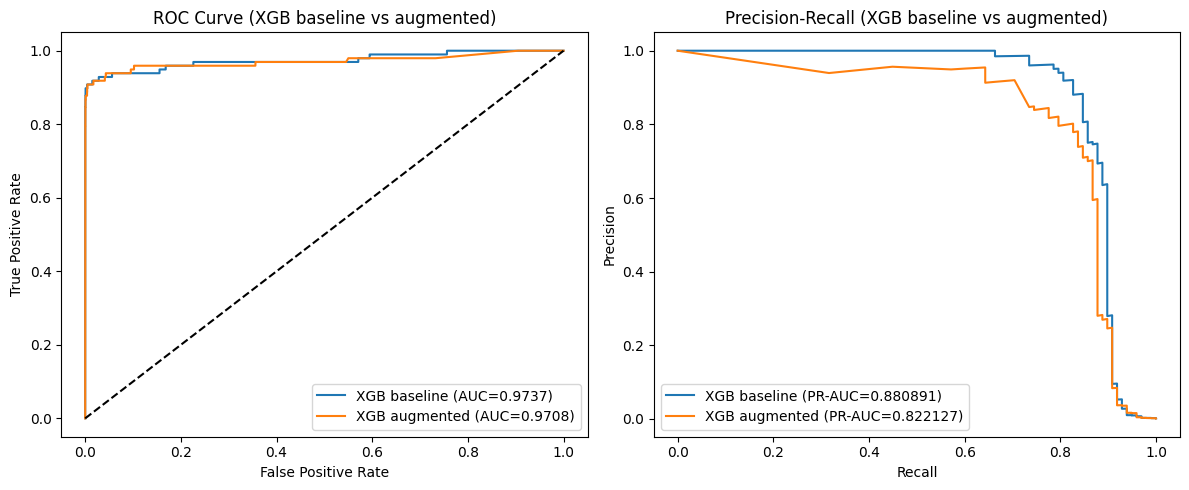

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

plt.figure(figsize=(12,5))

# ROC
plt.subplot(1,2,1)
fpr_b, tpr_b, _ = roc_curve(y_test, xgb_scores)       # baseline
fpr_a, tpr_a, _ = roc_curve(y_test, xgb_aug_scores)   # augmented
plt.plot(fpr_b, tpr_b, label=f'XGB baseline (AUC={auc(fpr_b, tpr_b):.4f})')
plt.plot(fpr_a, tpr_a, label=f'XGB augmented (AUC={auc(fpr_a, tpr_a):.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGB baseline vs augmented)')
plt.legend()

# Precision-Recall
plt.subplot(1,2,2)
prec_b, rec_b, _ = precision_recall_curve(y_test, xgb_scores)
prec_a, rec_a, _ = precision_recall_curve(y_test, xgb_aug_scores)
plt.plot(rec_b, prec_b, label=f'XGB baseline (PR-AUC={auc(rec_b, prec_b):.6f})')
plt.plot(rec_a, prec_a, label=f'XGB augmented (PR-AUC={auc(rec_a, prec_a):.6f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (XGB baseline vs augmented)')
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
joblib.dump(rf, 'rf_baseline.joblib')
xgb_clf.save_model('xgb_baseline.json')
autoencoder.save('autoencoder_model.h5')
joblib.dump(scaler_all, 'scaler_all.joblib')


['scaler_all.joblib']

In [40]:
from google.colab import drive
drive.mount('/content/drive')

# Save a model to your Drive
joblib.dump(rf, '/content/drive/MyDrive/HybridFraudDetection/rf_baseline.joblib')


MessageError: Error: credential propagation was unsuccessful

In [41]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [42]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [43]:
import joblib
import os

# Create a folder for saving models
save_path = '/content/drive/MyDrive/HybridFraudDetection'
os.makedirs(save_path, exist_ok=True)

# Save all your trained models
joblib.dump(rf, os.path.join(save_path, 'rf_baseline.joblib'))
xgb_clf.save_model(os.path.join(save_path, 'xgb_baseline.json'))
autoencoder.save(os.path.join(save_path, 'autoencoder_model.keras'))
joblib.dump(scaler_all, os.path.join(save_path, 'scaler_all.joblib'))

print(f"✅ All models saved successfully to: {save_path}")


✅ All models saved successfully to: /content/drive/MyDrive/HybridFraudDetection


In [44]:
!ls "/content/drive/MyDrive/HybridFraudDetection"


autoencoder_model.keras  scaler_all.joblib
rf_baseline.joblib	 xgb_baseline.json


In [45]:
!git --version


git version 2.34.1


In [47]:
!git config --global user.name "jaynakar"
!git config --global user.email "jaynakar2784@gmail.com"

In [48]:
!git clone https://github.com/jaynakar/Hybrid-Fraud-Detection.git


Cloning into 'Hybrid-Fraud-Detection'...


In [49]:
%cd Hybrid-Fraud-Detection


/content/Hybrid-Fraud-Detection


In [50]:
!git checkout -b autoencoder-integration


Switched to a new branch 'autoencoder-integration'


In [52]:
!cp /content/CreditCardFraudDetection.ipynb .
!cp /content/rf_baseline.joblib .
!cp /content/xgb_baseline.json .
!cp /content/autoencoder_model.h5 .
!cp /content/scaler_all.joblib .


cp: cannot stat '/content/CreditCardFraudDetection.ipynb': No such file or directory
